In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/NVL Historical Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/22/2024,"17,100","17,200","17,450","16,950",29.12M,0.00%
1,03/21/2024,"17,100","16,800","17,100","16,600",42.48M,3.32%
2,03/20/2024,"16,550","16,500","16,650","16,350",12.08M,0.30%
3,03/19/2024,"16,500","16,900","16,900","16,500",9.76M,-1.20%
4,03/18/2024,"16,700","16,500","17,100","16,150",36.47M,1.21%


In [4]:
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df=df[::-1]

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,27815.0,"27,645","27,900","27,645",837.75K,0.61%
2018-01-03,28410.0,"27,815","28,452","27,815",2.08M,2.14%
2018-01-04,28707.0,"28,410","28,750","28,028",2.66M,1.05%
2018-01-05,28962.0,"28,622","29,047","28,452",2.55M,0.89%
2018-01-08,29556.0,"28,877","29,641","28,877",2.72M,2.05%


In [7]:
#Chuẩn hóa dữ liệu
df1=df.reset_index()['Price']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.21390472],
       [0.22115057],
       [0.2247674 ],
       ...,
       [0.07672074],
       [0.08341858],
       [0.08341858]])

In [9]:
# Prepare the dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [10]:
time_step = 100
X, y = create_dataset(df1, time_step)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [11]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [12]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate mean absolute error
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

Train MAE: 569.1503199003594
Test MAE: 417.0108708573748


In [13]:
# Predict future 30 days
x_input = df1[len(df1) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
while (i < 90):
    if (len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

In [14]:
# Inverse transform the future predictions
future_predict = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

In [15]:
future_predict

array([[17084.98074921],
       [17172.39722721],
       [17328.06930179],
       [17421.46719308],
       [17586.88846526],
       [17858.83921706],
       [18008.40219975],
       [18035.4991611 ],
       [18282.72192106],
       [18295.9808625 ],
       [18611.08221442],
       [18701.88328437],
       [18780.16972404],
       [18961.91184089],
       [19052.94533034],
       [19115.59581221],
       [19261.7933603 ],
       [19294.35201125],
       [19376.99879131],
       [19558.02324776],
       [19677.65065012],
       [19750.26361625],
       [19946.99280471],
       [20022.90797717],
       [20139.23739377],
       [20254.16039008],
       [20385.49533098],
       [20502.48277657],
       [20771.20042485],
       [20895.59909299],
       [20994.45188962],
       [21282.43151673],
       [21395.25907302],
       [21502.65375975],
       [21609.92663239],
       [21826.11104216],
       [21940.82187173],
       [22023.55798318],
       [22227.83759804],
       [22372.07816071],


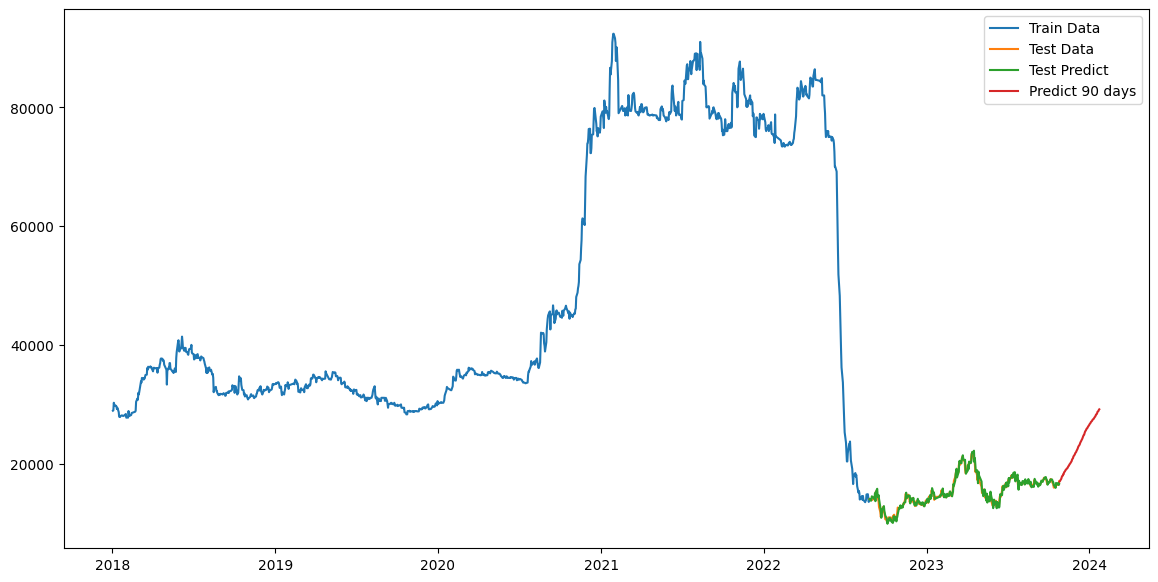

In [16]:
# Calculate the start and end dates for the future predictions
start_date = df.index[-1] + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=89)  # 30 days including start_date
predict_dates = pd.date_range(start=start_date, end=end_date)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot train data
plt.plot(df.index[:train_size], y_train, label='Train Data')

# Plot test data
plt.plot(df.index[train_size:train_size + test_size], y_test, label='Test Data')

# Plot test predict data
plt.plot(df.index[train_size:train_size + test_size], test_predict, label='Test Predict')

last_test_date = df.index[train_size + test_size - 1]
future_predict_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90)
plt.plot(future_predict_dates, future_predict, label='Predict 90 days')


# Display the legend
plt.legend()

# Display the plot
plt.show()